# Project description & work plan

I'm an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on my site every day. I need to study data collected over the last few years and determine which factors influence the price of a vehicle.

**work plan to be completed stepwise:**

1. Open the data file and study the general information.

2. Data preprocessing:

    1. Identify and study missing values.
    2. Convert the data to the required types:
    
3. Calculate and add to the table the following:

    1. Day of the week, month, and year the ad was placed
    2. The vehicle's age (in years) when the ad was placed
    3. The vehicle's average mileage per year
    4. In the condition column, replace string values with a numeric scale:
    
        1. new = 5
        2. like new = 4
        3. excellent = 3
        4.	good = 2
        5.	fair = 1
        6.	salvage = 0
        
4. Carry out exploratory data analysis:

      1. Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and    condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.
      2.	Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.
      3.	Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.
      4.	Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.
      5.	Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.
      6.	What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

6. Write an overall conclusion.

**Description of the data**

The dataset contains the following fields:

1. 	price
2.	model_year
3.	model
4.	condition
5.	cylinders
6.	fuel — gas, diesel, etc.
7.	odometer — the vehicle's mileage when the ad was published
8.	transmission
9.	paint_color
10.	is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
11.	date_posted — the date the ad was published
12.	days_listed — from publication to removal


## Initialization

In [1]:
import matplotlib
import pandas   as pd
import numpy    as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load data

In [2]:
data = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [6]:
data.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [7]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
data.isnull().sum()/len(data)*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [9]:
data.duplicated().sum()

0

In [10]:
for col in data.columns:
    data_count = data[col].value_counts()
    print(f" {col} value counts: \n {data_count} \n")

 price value counts: 
 1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64 

 model_year value counts: 
 2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64 

 model value counts: 
 ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64 

 condition value 

### Conclusions

**Description of what I know on the data so far**

1. 	The data has 51525 rows in 13 diffrent columns.
2.	The data is build from 2 integer, 4 float and 7 object dtypes.
3.	There are missing values in five columns:
    1.	Column model_year has **7.02%** of missing values.
    2.	Column odometer has **15.32%** of missing values.
    3.	Column cylinders has **10.20%** of missing values.
    4.	Column paint_color has **17.98%** of missing values.
    5.	Column is_4wd has **50.36%** of missing values.
9.	There is no duplicate values.
10.	There is 798 vehicles with the price value of 1.
11.	There is 185 vehicles with the odometer value of 0.

### further steps

**Description of what I'm going to do base on what I know on the data so far:**

1.	Investegate & replace missing values:
    1.	Column model_year has **7.02%** of missing values.
    2.	Column odometer has **15.32%** of missing values.
    3.	Column cylinders has **10.20%** of missing values.
    4.	Column paint_color has **17.98%** of missing values.
    5.	Column is_4wd has **50.36%** of missing values. **around 50% of the data**
2.	Investegate price value column - there is 798 vehicles with the price value of 1. **Not a normal value for price**
3.	Investegate odometer value column - There is 185 vehicles with the odometer value of 0. **Maybe new vehicles?? need to look into it.**
4.  Most of the coulmns are object and float64 type. **Need to change the Dtype for more investegation and more caculations in the next steps.**
5.  The date_posted coulmn need to be change to **datetime** so we can work with the data.

## Treat missing values

**is_4wd**==
Base on the fact that around 50% of the **is_4wd** is Nan I can assume that its becuse those vehicles are 2wd type and the people that fill the Ad or form just left them **blank becuse there vehicle type dont have 4wd.** base on that assumetion i can just fill those cell **with 0 which mean False**, becuse when they **do have 4wd the cell is True and get 1.**

In [11]:
data['is_4wd'] = data['is_4wd'].fillna(value = 0)

In [12]:
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

**paint_color**== Base on the fact that around **18%** of the **paint_color** is missing, and base on the fact that color is not a value that **can be fill using any of my other values or columns.** I can assume that there was another factor that I dont have, maybe they upload pics of the vehicles and didnt think filling the color filld is necesery? maybe thay just forget it? maybe it was special color - like in sport cars, and it wasnt in the colors manu?. but I can't just drop the data becuse the missing values are 18% of it. therfor I will fill the missing values creating a new value called **other_color**

In [13]:
data['paint_color'] = data['paint_color'].fillna(value = 'other_color')

In [14]:
data['paint_color'].value_counts()

white          10029
other_color     9267
black           7692
silver          6244
grey            5037
blue            4475
red             4421
green           1396
brown           1223
custom          1153
yellow           255
orange           231
purple           102
Name: paint_color, dtype: int64

**cylinders**== Base on the fact that around **10%** of the **cylinders** is missing, I can assume that maybe 10% of the people that fill the ads form **not really sure how many cylinders there vehicle has**. cylinders are **related to the car size and type of use**, for example bus will have more cylinders then sadan car. **Im going to fill the missing values with the avg cylinders values from the same type of vehicles.**

In [15]:
cylinders_pivot = data.pivot_table(index='type', values='cylinders',
                                       aggfunc=['mean','median','count']).reset_index()

In [16]:
cylinders_pivot

,type,mean,median,count
,,cylinders,cylinders,cylinders
0,SUV,5.905017,6.0,11181
1,bus,9.100000,10.0,20
2,convertible,6.963415,8.0,410
3,coupe,6.451225,6.0,2081
4,hatchback,4.159215,4.0,917
5,mini-van,5.966151,6.0,1034
6,offroad,6.177083,6.0,192
7,other,5.688889,6.0,225
8,pickup,7.187440,8.0,6274


cylinders have to be a round full number, that way I will fill the missing values with the **median and not with the mean.**

In [17]:
cylinders_pivot.columns = ['type','mean','median','count']

In [18]:
cylinder_dict = cylinders_pivot.set_index('type')['median'].to_dict()

In [19]:
cylinder_dict

{'SUV': 6.0,
 'bus': 10.0,
 'convertible': 8.0,
 'coupe': 6.0,
 'hatchback': 4.0,
 'mini-van': 6.0,
 'offroad': 6.0,
 'other': 6.0,
 'pickup': 8.0,
 'sedan': 4.0,
 'truck': 8.0,
 'van': 6.0,
 'wagon': 4.0}

In [20]:
data['cylinders'] = data['cylinders'].fillna(data['type'].map(cylinder_dict))

In [21]:
data['cylinders'].isna().sum()

0

**odometer**== Base on the fact that around **15.32%** of the **odometer** is missing, and base on the fact that **odometer** is very importent value like price for example when people coming to buy a vhicle. without knowing the real reason way people left this value empty (maybe thay have high values? which will lower there price values??). **I will need to fill this value and can't just drop the missing values.** I choose to fill this values with correlation to the **condition** of the vhicle, it will be a good **assuamtion to belive that the less the condition shape is, the more the odometer value will rise.**

In [22]:
odometer_pivot = data.pivot_table(index='condition', values='odometer', 
                                           aggfunc=['mean','median','count']).reset_index()

In [23]:
odometer_pivot

,condition,mean,median,count
,,odometer,odometer,odometer
0,excellent,106687.682258,104230.0,20973
1,fair,183062.233577,181613.0,1370
2,good,129919.930980,129000.0,17053
3,like new,79426.738166,72982.5,4014
4,new,43476.056000,8002.0,125
5,salvage,140919.989796,142673.5,98


In [24]:
odometer_pivot.columns = ['type','mean','median','count']

In [25]:
odometer_dict = odometer_pivot.set_index('type')['median'].to_dict()

In [26]:
odometer_dict

{'excellent': 104230.0,
 'fair': 181613.0,
 'good': 129000.0,
 'like new': 72982.5,
 'new': 8002.0,
 'salvage': 142673.5}

In [27]:
data['odometer'] = data['odometer'].fillna(data['condition'].map(odometer_dict))

In [28]:
data['odometer'].isnull().sum()

0

**model_year**== Base on the fact that around **7.02%** of the model_year is missing, and base on the fact that **model_year is very importent value that effect the price, for example when people coming to buy a vhicle.** without knowing the real reason way people left this value empty (maybe thay have low values? which will lower there price values??). I will need to fill this value and can't just drop the missing values. I choose to fill this values the some way I fill the odometer value with correlation to the condition of the vhicle, it will be a good assuamtion to belive that the **less the condition shape is, the more the model_year value will lower(year wise)**.

In [29]:
data.pivot_table(index='condition', values='model_year', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,model_year,model_year,model_year
condition,,,
excellent,2010.712490,2012.0,23074
fair,2001.975201,2003.0,1492
good,2008.531639,2009.0,18695
like new,2012.469041,2014.0,4409
new,2014.466165,2018.0,133
salvage,2005.631068,2005.0,103


**model_year** have to be a round full number, that way **I will fill the missing values with the median and not with the mean.**

In [30]:
def model_year_Nan(data):
    condition=data['condition']
    model_year_is_nan = pd.isna(data['model_year'])
    if model_year_is_nan:
        if condition == 'excellent':
            return 2012
        elif condition == 'good':
            return 2009
        elif condition == 'like new':
            return 2014
        elif condition == 'new':
            return 2018
        else:
            return 2003
    else:
        return data['model_year']

In [31]:
new_model_year=data.apply(model_year_Nan, axis=1)
data['model_year']=new_model_year

In [32]:
data['model_year'].isnull().sum()

0

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [34]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.815953,6.130810,115199.014508,0.496303,39.55476
std,10040.803015,6.092050,1.658414,60484.863376,0.499991,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2007.000000,4.000000,75668.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,110908.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,147821.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


**Description of what I'm going to do next**

1.	Changing TYPES:
    1.	Column **model_year** is **float64**, going to change it to **int 16**.
    2.	Column **is_4wd** is **float64**, going to change it to **bool**.
    3.	Column **days_listed** is **int64**, going to change it to **int16**.
    4.	Column **cylinders** is **float64**, going to change it to **int16**.
    5.	Column **date_posted** is **object**, going to change it to **datetime**.
    6.  Column **model** will be check and group.

In [35]:
data['model_year'] = data.model_year.astype('Int16')

In [36]:
data['is_4wd'] = data.is_4wd.astype('bool') 

In [37]:
data['days_listed'] = data.days_listed.astype('int16')

In [38]:
data['cylinders'] = data.cylinders.astype('Int16')

In [39]:
data['date_posted'] = pd.to_datetime(data.date_posted, format='%Y-%m-%d')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null Int16
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null Int16
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int16
dtypes: Int16(2), bool(1), datetime64[ns](1), float64(1), int16(1), int64(1), object(6)
memory usage: 4.0+ MB


In [41]:
data.describe()

,price,model_year,cylinders,odometer,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.815953,6.130810,115199.014508,39.55476
std,10040.803015,6.092050,1.658414,60484.863376,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.00000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000


In [42]:
data['model'].nunique()

100

In [43]:
data.model.value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [44]:
data.model.unique

<bound method Series.unique of 0                bmw x5
1            ford f-150
2        hyundai sonata
3            ford f-150
4          chrysler 200
              ...      
51520     nissan maxima
51521       honda civic
51522    hyundai sonata
51523    toyota corolla
51524     nissan altima
Name: model, Length: 51525, dtype: object>

In [45]:
data['model'] = [name.split(' ', 1)[0] for name in data.model]

In [46]:
data.model.value_counts()

ford             12672
chevrolet        10611
toyota            5445
honda             3485
ram               3316
jeep              3281
nissan            3208
gmc               2378
subaru            1272
dodge             1255
hyundai           1173
volkswagen         869
chrysler           838
kia                585
cadillac           322
buick              271
bmw                267
acura              236
mercedes-benz       41
Name: model, dtype: int64

In [47]:
data['model'].nunique()

19

In [48]:
data.duplicated().sum()

0

### Conclusions
**Description of what I did & what I know on the data so far**

1. 	**is_4wd ==** Missing values replace with **0**, type replace to **boolean**.
2.	**paint_color ==** Missing values replace with **other_color**.
3.  **cylinders ==** Missing values replace with **median of the some size & type of vehicles**, type replace to **int16**.  
4.  **odometer==** Missing values replace with **median of the some condition of vehicles**.
5.  **model_year==** Missing values replace with **median, condition of model_year**,type replace to **int16**.
6.  **date_posted==** type change to **date_time**.
7.  **model==** categoraized so we can do caculations on **19** diffrent values and not **100**.
8.	**what I know on the data so far:**
    1.	There is **no** missing values left.
    2.	All the columns have **correct** data types.
    3.	There is still 0 odometer values when the vehicles not **NEW**.
    4.	There is **no** duplicate values.

### further steps

**Description of what I'm going to do base on what I know on the data so far**

1.	Calculate and add to the table the following:
    1.	Day of the week, month, and year the ad was placed.
    2.	The vehicle's age (in years) when the ad was placed.
    3.	The vehicle's average mileage per year.
    4.	In the condition column, replace string values with a numeric scale:
        1.	new = 5
        2.  like new = 4
        3.  excellent = 3
        4.  good = 2
        5.  fair = 1
        6.  salvage = 0

## Enrich data

**Add : day of the week**

In [49]:
data['ad_day'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d').dt.weekday

**Add :month**

In [50]:
data['ad_month'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d').dt.month

**Add :year**

In [51]:
data['ad_year'] = pd.to_datetime(data['date_posted'], format = '%Y').dt.year

**Add :age**

In [52]:
data['age'] = data['ad_year'] - data['model_year']

**Add :mileage per year**

In [53]:
data['mil_per_year'] = (data['odometer'].where(data['age'] == 1 , round(data['odometer'] / data['age'])))

**replace :In the condition column, string values with a numeric scale**

In [54]:
def condition_num(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition =='fair':
        return 1
    else:
        return 0
    

condition_lable = data['condition'].apply(condition_num)
data['condition']= condition_lable

In [55]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,age,mil_per_year
0,9400,2011,bmw,2,6,gas,145000.0,automatic,SUV,other_color,True,2018-06-23,19,5,6,2018,7,20714.0
1,25500,2009,ford,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,9,9856.0
2,5500,2013,hyundai,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.0
3,1500,2003,ford,1,8,gas,181613.0,automatic,pickup,other_color,False,2019-03-22,9,4,3,2019,16,11351.0
4,14900,2017,chrysler,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40452.0
5,14990,2014,chrysler,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.0
6,12990,2015,toyota,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,26404.0
7,15990,2013,honda,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,18246.0
8,11500,2012,kia,3,4,gas,104174.0,automatic,SUV,other_color,True,2018-07-16,19,0,7,2018,6,17362.0
9,9200,2008,honda,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,13381.0


In [56]:
data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,age,mil_per_year
51520,9249,2013,nissan,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2,10,2018,5,17627.0
51521,2700,2002,honda,0,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2,11,2018,16,11344.0
51522,3950,2009,hyundai,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,9,14222.0
51523,7455,2013,toyota,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,0,7,2018,5,27915.0
51524,6300,2014,nissan,2,4,gas,129000.0,automatic,sedan,other_color,False,2018-06-05,10,1,6,2018,4,32250.0


In [57]:
data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,ad_day,ad_month,ad_year,age,mil_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,49392.000000,49390.000000
mean,12132.464920,2009.815953,2.637535,6.130810,115199.014508,39.55476,3.005434,6.628491,2018.307462,8.858216,18279.304383
std,10040.803015,6.092050,0.712447,1.658414,60484.863376,28.20427,1.997759,3.474134,0.461447,5.970384,14561.042574
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,1.000000,3.000000,2018.000000,5.000000,10426.000000
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,3.000000,7.000000,2018.000000,8.000000,14890.000000
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,21466.250000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,110.000000,279365.000000


In [58]:
data.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,age,mil_per_year
count,51525.000000,51525.000000,51525,51525.000000,51525.000000,51525,51525.000000,51525,51525,51525,51525,51525,51525.00000,51525.000000,51525.000000,51525.000000,49392.000000,49390.000000
unique,NaN,NaN,19,NaN,NaN,5,NaN,3,13,13,2,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford,NaN,NaN,gas,NaN,automatic,SUV,white,False,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,12672,NaN,NaN,47288,NaN,46902,12405,10029,25953,186,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,12132.464920,2009.815953,NaN,2.637535,6.130810,NaN,115199.014508,NaN,NaN,NaN,NaN,NaN,39.55476,3.005434,6.628491,2018.307462,8.858216,18279.304383
std,10040.803015,6.092050,NaN,0.712447,1.658414,NaN,60484.863376,NaN,NaN,NaN,NaN,NaN,28.20427,1.997759,3.474134,0.461447,5.970384,14561.042574
min,1.000000,1908.000000,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,NaN,2.000000,4.000000,NaN,75668.000000,NaN,NaN,NaN,NaN,NaN,19.00000,1.000000,3.000000,2018.000000,5.000000,10426.000000


## Exploratory data analysis:

1. **Work plan:**

      1. Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and    condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.
      2.	Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.
      3.	Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

### Study core parameters

**The parameters are**
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

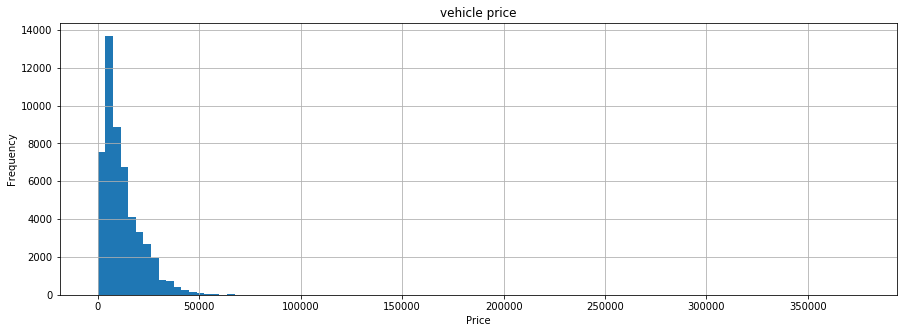

In [59]:
data['price'].plot(kind = 'hist', title = 'vehicle price', bins = 100, figsize = (15, 5), grid=True)
plt.xlabel('Price')
plt.show()

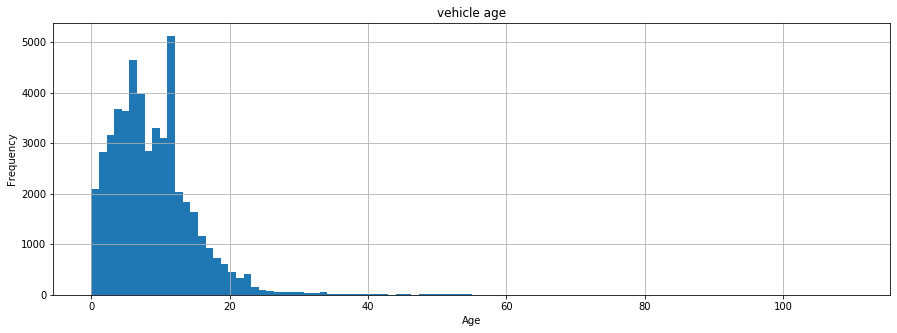

In [60]:
data['age'].plot(kind = 'hist', title = 'vehicle age', bins = 100, figsize = (15, 5), grid=True)
plt.xlabel('Age')
plt.show()

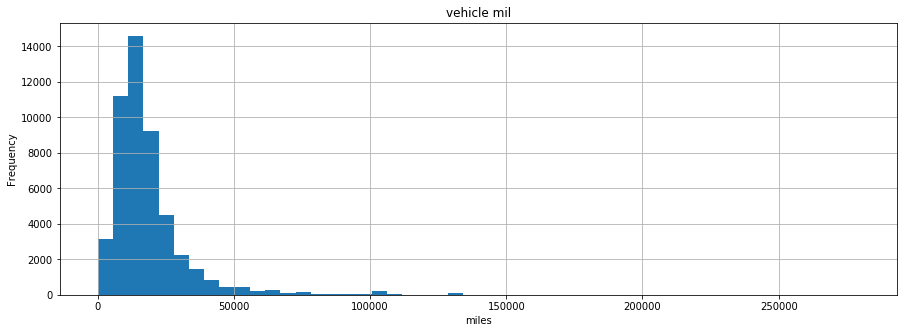

In [61]:
data['mil_per_year'].plot(kind = 'hist', title = 'vehicle mil', bins = 50, figsize = (15, 5), grid=True)
plt.xlabel('miles')
plt.show()

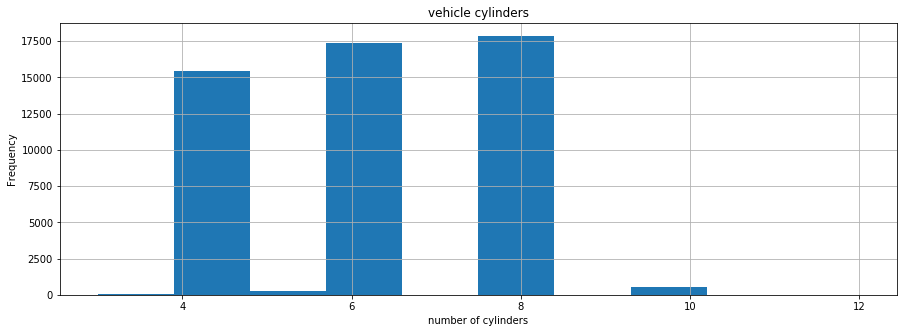

In [62]:
data['cylinders'].plot(kind = 'hist', title = 'vehicle cylinders', bins = 10, figsize = (15, 5), grid=True)
plt.xlabel('number of cylinders')
plt.show()

Text(0.5, 0, 'Condition')

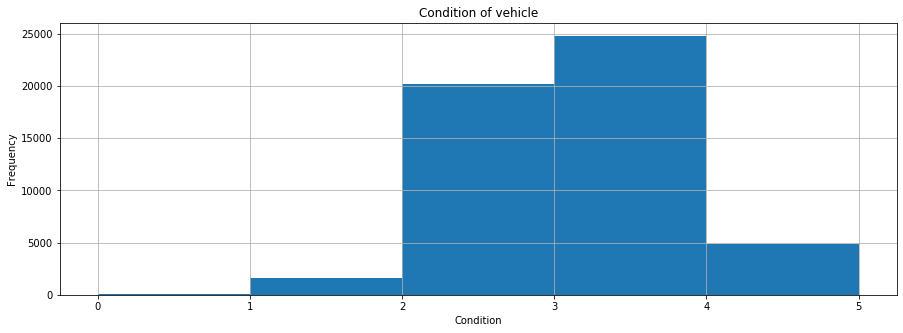

In [63]:
data['condition'].plot(kind = 'hist', title = 'Condition of vehicle', bins = 5, figsize = (15, 5), grid=True)
plt.xlabel('Condition')


In [64]:
data.condition.value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

### Sub Conclusions
**Description of what I did & what I know on the data so far**

1. 	**After polting HIST to the specific columns my resarch shows:**
    1.	**vehicle price ==** Skewed to the **left**, Not to informetive, Most vhicle are between **5K-20K**.
    2.  **vehicle age ==** Skewed to the **left**, Not to informetive, Most vhicle are between **0-15 years.**
    3.  **vehicle mil==** Skewed to the **left**, Not to informetive, Most vhicle are between **50K-100K milege.**
    4.  **vehicle cylinders==** Most of the vehicle have **4,6,8 cylinders**. there is almost **no vehicles with 3,5,10 cylinders.**
    5.  **Condition of vehicle==** Most of the vehicle are in **2-4 value**, there is almost **no vehicle with 0,1 value**.

### Study and treat outliers

**Condition of vehicle == outliers**

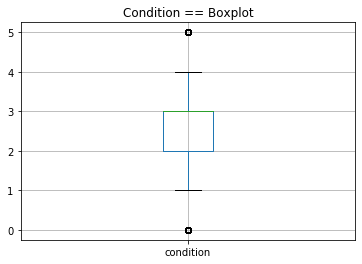

In [65]:
data.boxplot('condition')
plt.title('Condition == Boxplot')
plt.show()

In [66]:
Q1 = data['condition'].quantile(0.25)

In [67]:
Q3 = data['condition'].quantile(0.75)

In [68]:
IQR = Q3 - Q1

In [69]:
(IQR)

1.0

In [70]:
condition_out = data.loc[(data['condition'] < (Q1- 1.5*IQR)) | (data['condition'] > (Q3 + 1.5 * IQR))]

In [71]:
len(condition_out)

258

In [72]:
len(condition_out)/len(data)*100

0.5007278020378457

**[condition == 258 outliers, less then 1% of data]**

**vehicle cylinders == outliers**

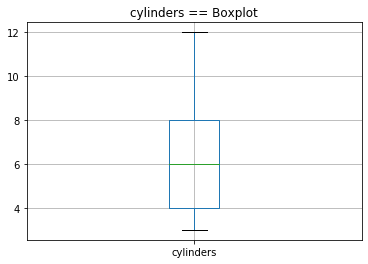

In [73]:
data.boxplot('cylinders')
plt.title('cylinders == Boxplot')
plt.show()

In [74]:
Q1 = data['cylinders'].quantile(0.25)

In [75]:
Q3 = data['cylinders'].quantile(0.75)

In [76]:
IQR = Q3 - Q1

In [77]:
(IQR)

4.0

In [78]:
cylinders_out = data.loc[(data['cylinders'] < (Q1- 1.5*IQR)) | (data['cylinders'] > (Q3 + 1.5 * IQR))]

In [79]:
len(cylinders_out)

0

In [80]:
len(cylinders_out)/len(data)*100

0.0

**[cylinders == no outliers]**

**vehicle mil == outliers**

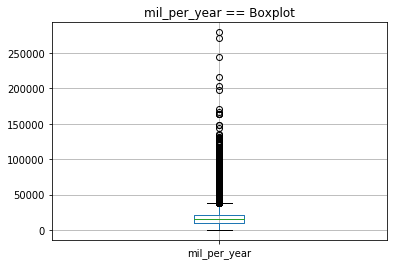

In [81]:
data.boxplot('mil_per_year')
plt.title('mil_per_year == Boxplot')
plt.show()

In [82]:
Q1 = data['mil_per_year'].quantile(0.25)

In [83]:
Q3 = data['mil_per_year'].quantile(0.75)

In [84]:
IQR = Q3 - Q1

In [85]:
(IQR)

11040.25

In [86]:
mil_per_year_out = data.loc[(data['mil_per_year'] < (Q1- 1.5*IQR)) | (data['mil_per_year'] > (Q3 + 1.5 * IQR))]

In [87]:
len(mil_per_year_out)

3118

In [88]:
len(mil_per_year_out)/len(data)*100

6.051431344007764

**[mil_per_year == 3608 outliers, around 7% of data]**

**vehicle age == outliers**

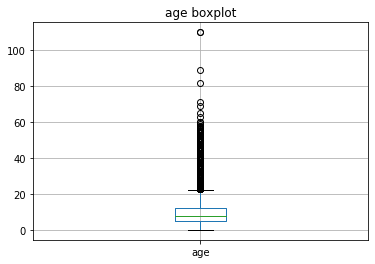

In [89]:
data.boxplot('age')
plt.title('age boxplot')
plt.show()

In [90]:
Q1 = data['age'].quantile(0.25)

In [91]:
Q3 = data['age'].quantile(0.75)

In [92]:
IQR = Q3 - Q1

In [93]:
(IQR)

7.0

In [94]:
age_out = data.loc[(data['age'] < (Q1- 1.5*IQR)) | (data['age'] > (Q3 + 1.5 * IQR))]

In [95]:
len(age_out)

1061

In [96]:
len(age_out)/len(data)*100

2.059194565744784

**[age == 1061 outliers, around 2% of data]**

**vehicle price == outliers**

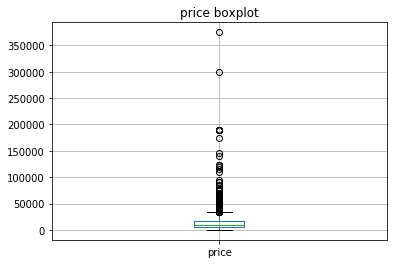

In [97]:
data.boxplot('price')
plt.title('price boxplot')
plt.show()

In [98]:
Q1 = data['price'].quantile(0.25)

In [99]:
Q3 = data['price'].quantile(0.75)

In [100]:
IQR = Q3-Q1

In [101]:
(IQR)

11839.0

In [102]:
price_out = data.loc[(data['price'] < (Q1- 1.5*IQR)) | (data['price'] > (Q3 + 1.5 * IQR))]

In [103]:
len(price_out)

1646

In [104]:
len(price_out) / len(data) * 100

3.194565744784086

**[price == 1646 outliers, around 3% of data]**

#### Remove outliers

In [105]:
outliers = pd.concat([price_out, age_out,mil_per_year_out, cylinders_out, condition_out])

In [106]:
len(outliers)

6083

In [107]:
len(outliers)/len(data)*100

11.805919456574479

In [108]:
outliers.duplicated().sum()

343

In [109]:
outliers = outliers.drop_duplicates()

In [110]:
len(outliers)

5740

In [111]:
len(outliers)/len(data)*100

11.140223192624939

In [112]:
data_filter = data[~data.index.isin(outliers.index)]

In [113]:
len(data_filter)

45785

In [114]:
len(data_filter)/len(data) * 100

88.85977680737506

**vehicle price == NO outliers**

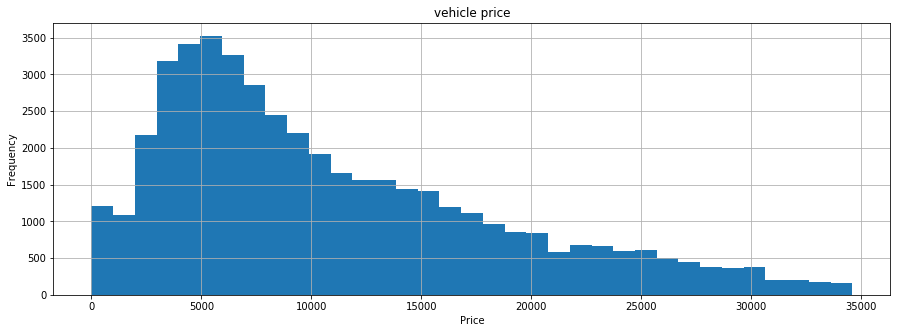

In [165]:
data_filter['price'].plot(kind = 'hist', title = 'vehicle price', bins = 35, figsize = (15, 5), grid=True)
plt.xlabel('Price')
plt.show()

**vehicle age == NO outliers**

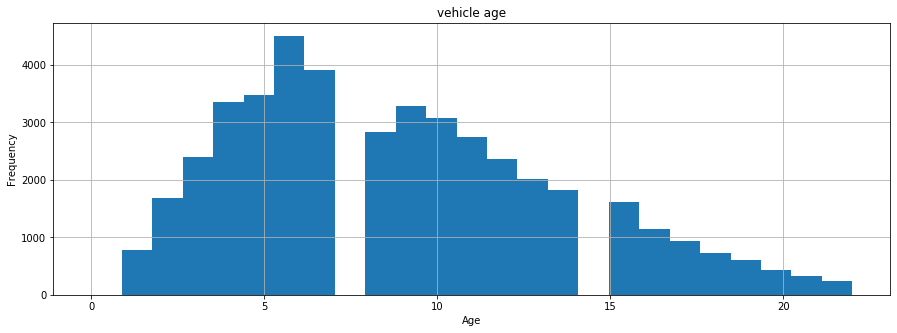

In [116]:
data_filter['age'].plot(kind = 'hist', title = 'vehicle age', bins = 25, figsize = (15, 5), grid=True)
plt.xlabel('Age')
plt.show()

**vehicle mil == NO outliers**

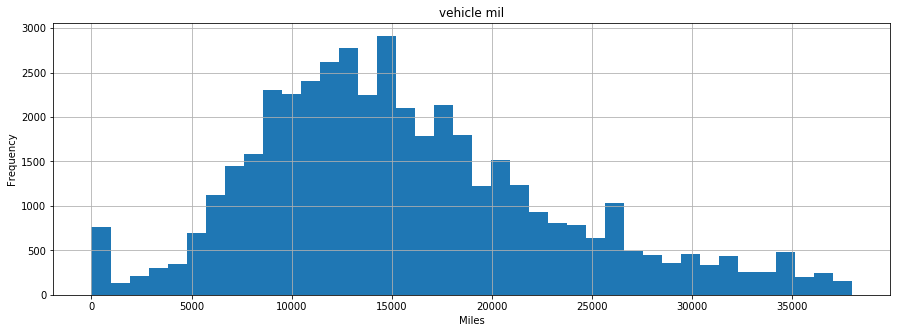

In [117]:
data_filter['mil_per_year'].plot(kind = 'hist', title = 'vehicle mil', bins = 40, figsize = (15, 5), grid=True)
plt.xlabel('Miles')
plt.show()

**vehicle cylinders == NO outliers**

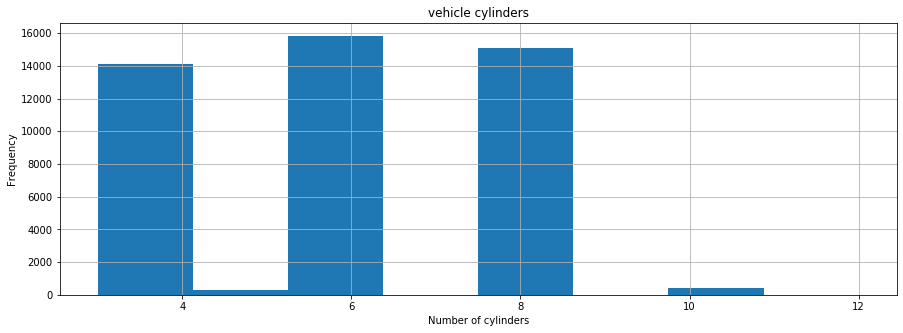

In [118]:
data_filter['cylinders'].plot(kind = 'hist', title = 'vehicle cylinders', bins = 8, figsize = (15, 5), grid=True)
plt.xlabel('Number of cylinders')
plt.show()

**Condition of vehicle == NO outliers**

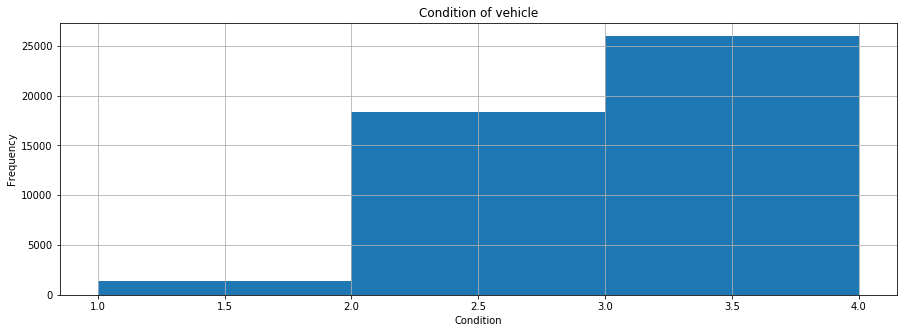

In [119]:
data_filter['condition'].plot(kind = 'hist', title = 'Condition of vehicle', bins = 3, figsize = (15, 5), grid=True)
plt.xlabel('Condition')
plt.show()

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price           51525 non-null int64
model_year      51525 non-null Int16
model           51525 non-null object
condition       51525 non-null int64
cylinders       51525 non-null Int16
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int16
ad_day          51525 non-null int64
ad_month        51525 non-null int64
ad_year         51525 non-null int64
age             49392 non-null Int64
mil_per_year    49390 non-null float64
dtypes: Int16(2), Int64(1), bool(1), datetime64[ns](1), float64(2), int16(1), int64(5), object(5)
memory usage: 6.0+ MB


In [121]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45785 entries, 0 to 51524
Data columns (total 18 columns):
price           45785 non-null int64
model_year      45785 non-null Int16
model           45785 non-null object
condition       45785 non-null int64
cylinders       45785 non-null Int16
fuel            45785 non-null object
odometer        45785 non-null float64
transmission    45785 non-null object
type            45785 non-null object
paint_color     45785 non-null object
is_4wd          45785 non-null bool
date_posted     45785 non-null datetime64[ns]
days_listed     45785 non-null int16
ad_day          45785 non-null int64
ad_month        45785 non-null int64
ad_year         45785 non-null int64
age             44267 non-null Int64
mil_per_year    44266 non-null float64
dtypes: Int16(2), Int64(1), bool(1), datetime64[ns](1), float64(2), int16(1), int64(5), object(5)
memory usage: 5.7+ MB


#### Compare Histograms

**price**

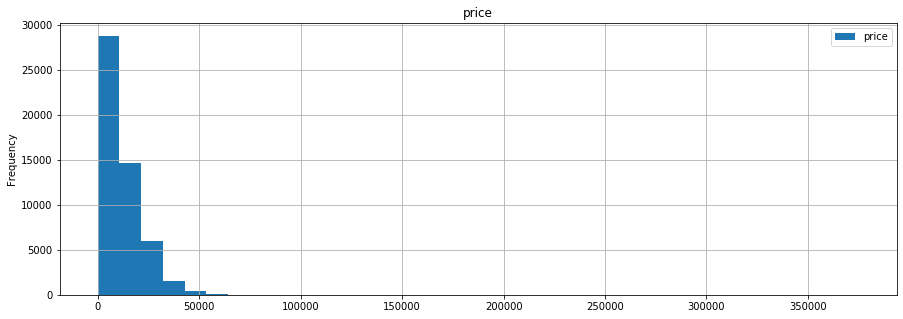

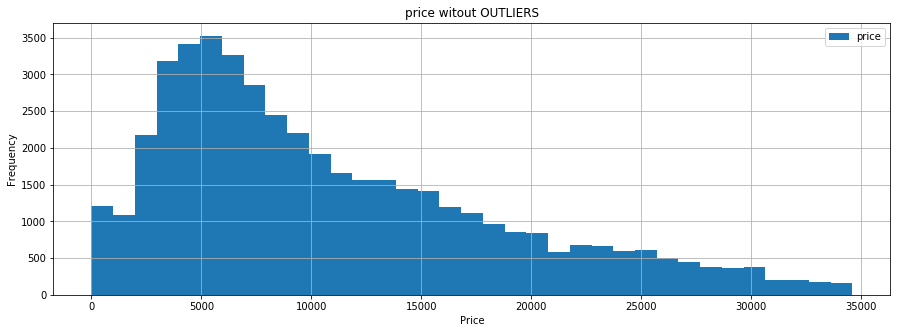

In [122]:
data[['price']].plot(kind = 'hist', title = 'price', bins = 35, figsize = (15, 5), grid=True);data_filter[['price']].plot(kind = 'hist', title = 'price witout OUTLIERS', bins = 35, figsize = (15, 5), grid=True)
plt.xlabel('Price')
plt.show()

**age**

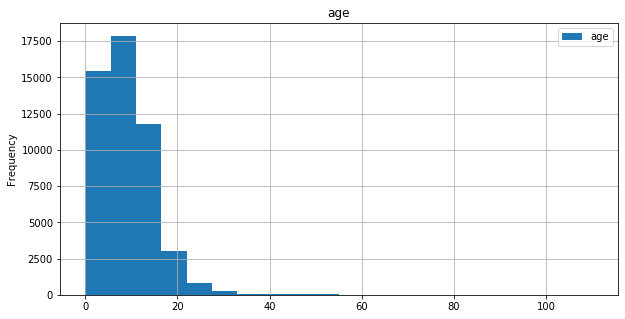

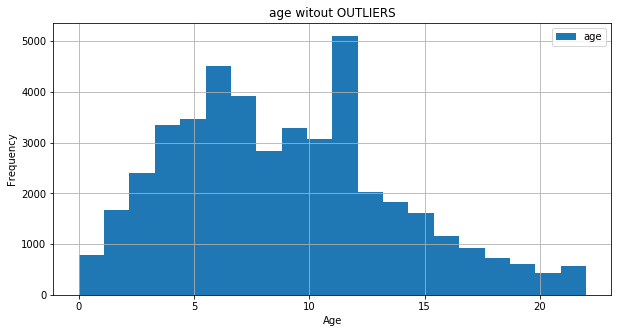

In [123]:
data[['age']].plot(kind = 'hist', title = 'age', bins = 20, figsize = (10, 5), grid=True);data_filter[['age']].plot(kind = 'hist', title = 'age witout OUTLIERS', bins = 20, figsize = (10, 5), grid=True)
plt.xlabel('Age')
plt.show()

**mil_per_year**

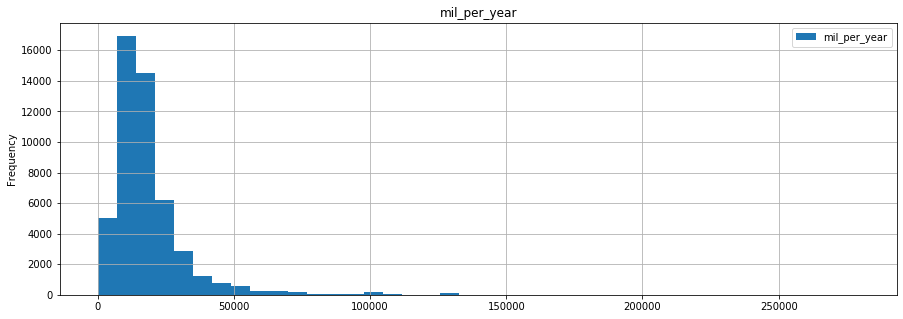

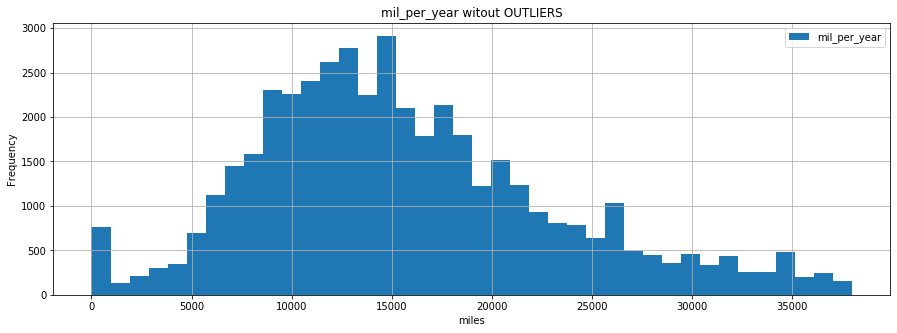

In [124]:
data[['mil_per_year']].plot(kind = 'hist', title = 'mil_per_year', bins = 40, figsize = (15, 5), grid=True);data_filter[['mil_per_year']].plot(kind = 'hist', title = 'mil_per_year witout OUTLIERS', bins = 40, figsize = (15, 5), grid=True)
plt.xlabel('miles')
plt.show()

**cylinders**

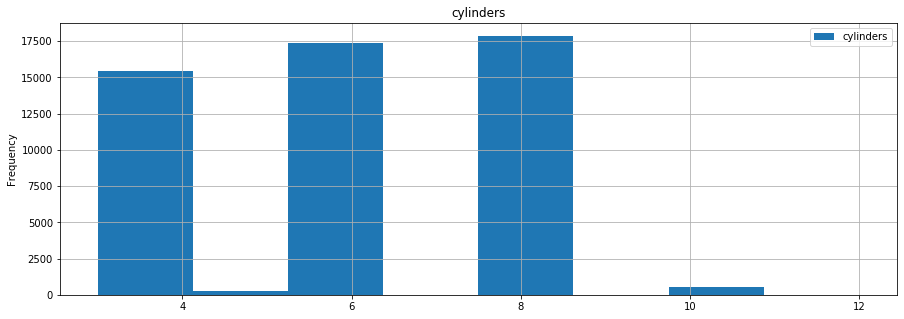

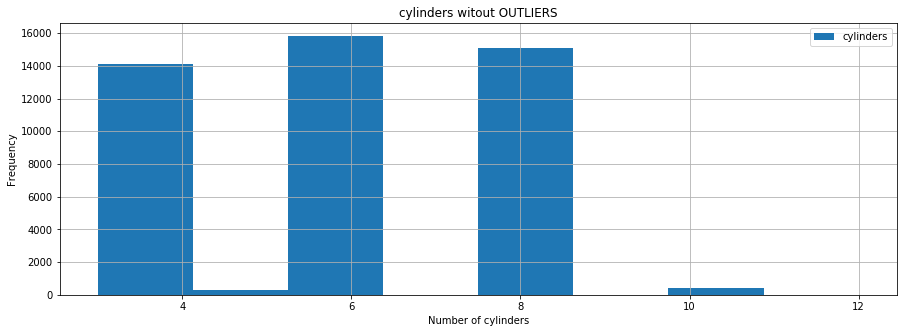

In [125]:
data[['cylinders']].plot(kind = 'hist', title = 'cylinders', bins = 8, figsize = (15, 5), grid=True);data_filter[['cylinders']].plot(kind = 'hist', title = 'cylinders witout OUTLIERS', bins = 8, figsize = (15, 5), grid=True)
plt.xlabel('Number of cylinders')
plt.show()

**condition**

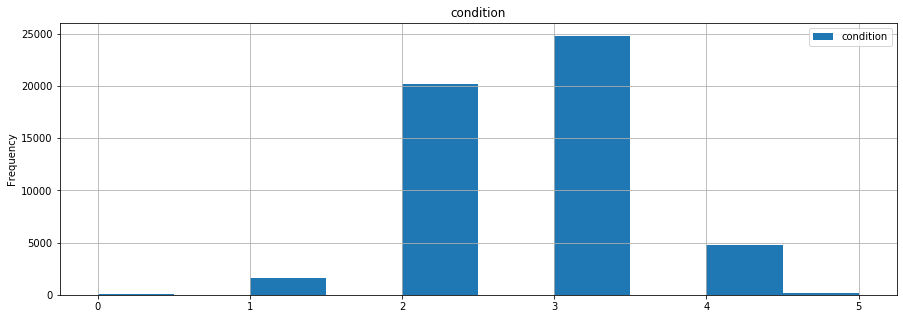

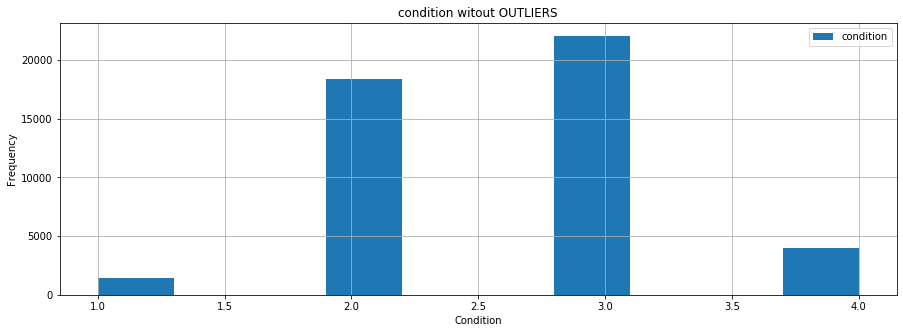

In [126]:
data[['condition']].plot(kind = 'hist', title = 'condition', bins = 10, figsize = (15, 5), grid=True);data_filter[['condition']].plot(kind = 'hist', title = 'condition witout OUTLIERS', bins = 10, figsize = (15, 5), grid=True)
plt.xlabel('Condition')
plt.show()

#### Sub Conclusions
**Description of what I did & what I know on the data so far**

1.  **After data preprocessing and outliers removal, the NEW data set becomes 88.18% of the original data. There are 45435 rows left in the new clean data from the original 51525 rows, we lost 12% of the original data, but with the remaining 88% the result of our study will be much accurate. The non outliers data was saved in new dataframe.**
2. 	**After removing all outliers & polting HIST to the specific NEW columns my resarch shows:**
    1.	**vehicle price ==** This histogram is of **"Right Skewed Distribution"**, The most popular price is **5k**.
    2.  **vehicle age ==**"Two-Peak Distribution"**, Most of the vehicle are 7 years old**. Then there is a gradual decline. Also there is a second peak at **11 years old**.
    3.  **vehicle mil==** This histogram is of **"Normal Distribution"** The most popular vehicles have been driven **12k** miles, whereas vehicles that have been driven between **5k-25k** make most of the vehicles on the website.
    4.  **vehicle cylinders== The result didnt make dramatic change after removing the outliers** Most of the vehicle have **4,6,8 cylinders**. there is almost **no vehicles with 3,5,10 cylinders.**
    5.  **Condition of vehicle== The result didnt make dramatic change after removing the outliers**, Most of the vehicle are in **2-4 value(excellent or good condition)**.

### continue work plan:

1.	Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.
      1.	Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.
      2.	What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

### Ads lifetime

1. Study how many days advertisements were displayed.
2. Calculate the mean and median, Describe the typical lifetime of an ad.
3. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [127]:
(data_filter.corr()['days_listed']).sort_values()

ad_month       -0.011920
model_year     -0.002170
price          -0.001684
cylinders       0.001241
mil_per_year    0.001476
is_4wd          0.001830
condition       0.002390
age             0.002618
ad_day          0.002700
odometer        0.005754
ad_year         0.012853
days_listed     1.000000
Name: days_listed, dtype: float64

In [128]:
data_filter['days_listed'].describe(include='all')

count    45785.000000
mean        39.553871
std         28.260012
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

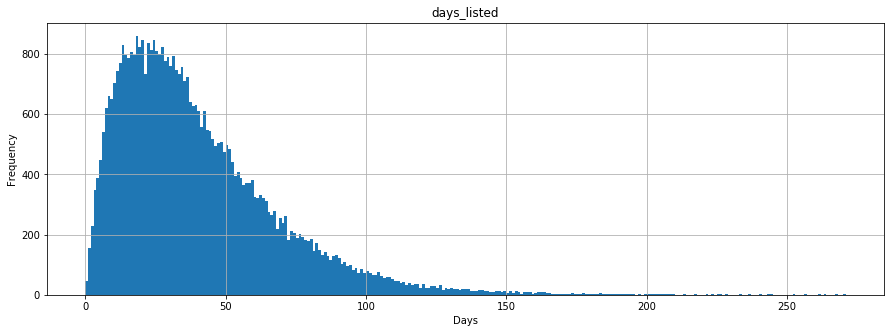

In [129]:
data_filter['days_listed'].plot(kind='hist',title = 'days_listed', bins=271, figsize = (15, 5), grid=True)
plt.xlabel('Days')
plt.show()

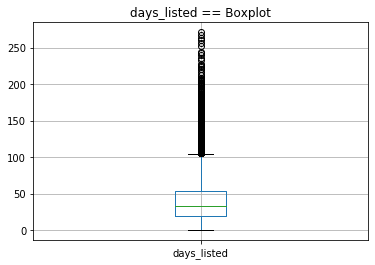

In [130]:
data_filter.boxplot('days_listed')
plt.title('days_listed == Boxplot')
plt.show()

In [131]:
def outliers_low_up(column):
    q1 = data_filter[column].quantile(0.25)
    q3 = data_filter[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)    


In [132]:
days_listed_out = outliers_low_up('days_listed')

In [133]:
('Outliers limit "days_listed"',days_listed_out)

('Outliers limit "days_listed"', (0, 104.0))

In [134]:
('{:} ads displayed for 0 day'.format(len(data_filter.query('days_listed == 0'))))

'46 ads displayed for 0 day'

In [135]:
('{:} ads displayed for more than {:.0f} days'.format(len(data_filter.query('days_listed > @days_listed_out[1]')),days_listed_out[1]))

'1443 ads displayed for more than 104 days'

1. **Sub Conclusions**
     1. By checking the correlation I found that days_listed of ad are **not related to car parameters**.
     2. The **mean for days_listed is 39.55 days** & the max is 271 days with **median of 33 days**.
     3. There are **47**ads that where remove on the same day.
     4. There are **1433** ads that where above the top outlier and removed after 104 days.
     5. The MAX life time of ad was **271 days approx 9 month**, and it was un **outlier**.
     6. **I can't point out on a specific value that change the life time of un ad**.

<font color='red'><b><u> Answer to reviewer.</u></b></font>
**FIX:** Thank you for your comment, and shering of knowlege, I did what you recommended and add **X value & general title **to the graphs. 

## Average price per each type of vehicle

1. Analyze the number of ads and the average price for each type of vehicle.
2. Plot a graph showing the dependence of the number of ads on the vehicle type.
3. Select the two types with the greatest number of ads.

In [136]:
avg_price_type = data_filter.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])

In [137]:
avg_price_type.columns=['ads','price']

In [138]:
avg_price_type.sort_values(by = 'ads', ascending = False)

,ads,price
type,,
SUV,11323,10116.896935
sedan,11288,6725.354624
truck,10444,14546.746745
pickup,6016,14530.571809
coupe,1899,13103.557662
wagon,1471,8672.065942
mini-van,1084,7681.882841
hatchback,955,6596.462827
van,562,8567.774021


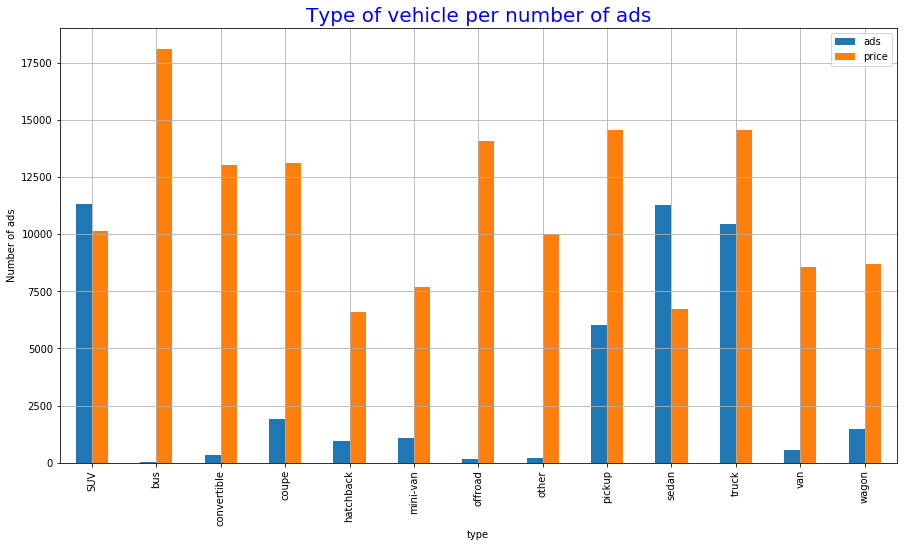

In [139]:
avg_price_type.plot(kind='bar', figsize=(15,8), grid=True)

plt.ylabel('Number of ads')
plt.title('Type of vehicle per number of ads', fontsize=20, color='blue')
plt.show()

1. **Sub Conclusions**
    1. **By checking the relationship between number of ads & type of vehicle I found that:**
         1. The **most ads** are for vehicles from types **SUV(11261) & SEDAN(11169), follow by truck in 3rd place**.
         2. The least ads are form types BUS(21) & OFFROAD(176).
         3. The price works in the **oposit direction**, **BUS & OFFROAD** are the **pricest vehicles** in the list. when **SEDAN** is the c**hipest vehicle in the list** & **SUV** is in the **median zone**.
         4. For the next resarch I will take **The 2 most ads** per type: **SUV(11261) & SEDAN(11169).** 

## Price factors

1. What factors impact the price most?
2. Take each of the popular types you detected at the previous stage and study whether the price depends on:
    1. age
    2. mileage
    3. condition
    4. transmission type
    5. color 

In [140]:
top_type = data_filter.query('type in ["SUV", "sedan"]')

In [141]:
top_type = top_type[['age','odometer','condition','transmission','paint_color','type','price']]

In [142]:
top_type.head(10)

,age,odometer,condition,transmission,paint_color,type,price
0,7,145000.0,2,automatic,other_color,SUV,9400
2,6,110000.0,4,automatic,red,sedan,5500
5,4,57954.0,3,automatic,black,sedan,14990
6,3,79212.0,3,automatic,white,sedan,12990
7,6,109473.0,3,automatic,black,SUV,15990
8,6,104174.0,3,automatic,other_color,SUV,11500
9,11,147191.0,3,automatic,blue,SUV,9200
11,7,111142.0,3,automatic,grey,sedan,8990
13,1,22104.0,3,automatic,silver,sedan,16500
14,10,132285.0,3,automatic,black,SUV,12990


In [143]:
(top_type.corr()['price'])

age         -0.527610
odometer    -0.441421
condition    0.257168
price        1.000000
Name: price, dtype: float64

<Figure size 720x720 with 0 Axes>

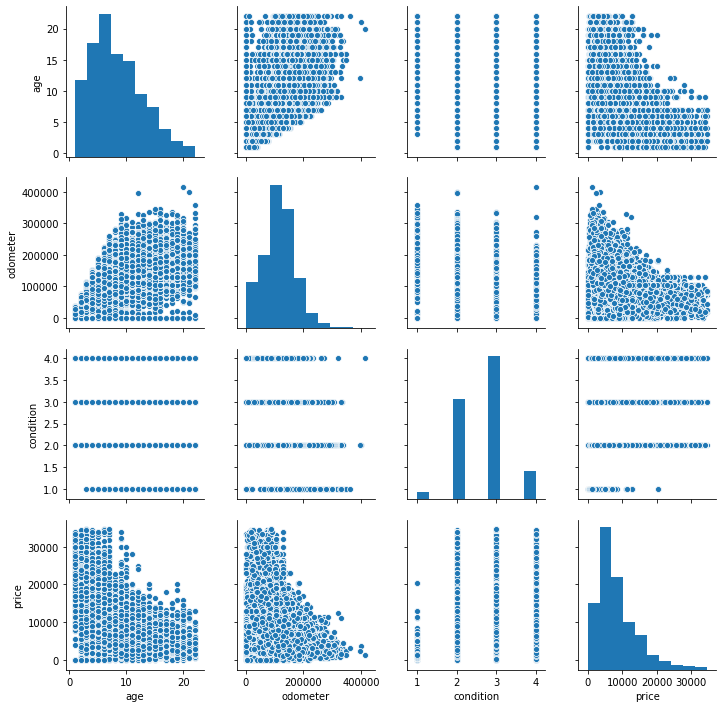

In [144]:
plt.figure(figsize = (10,10))
sns.pairplot(top_type)
plt.show()

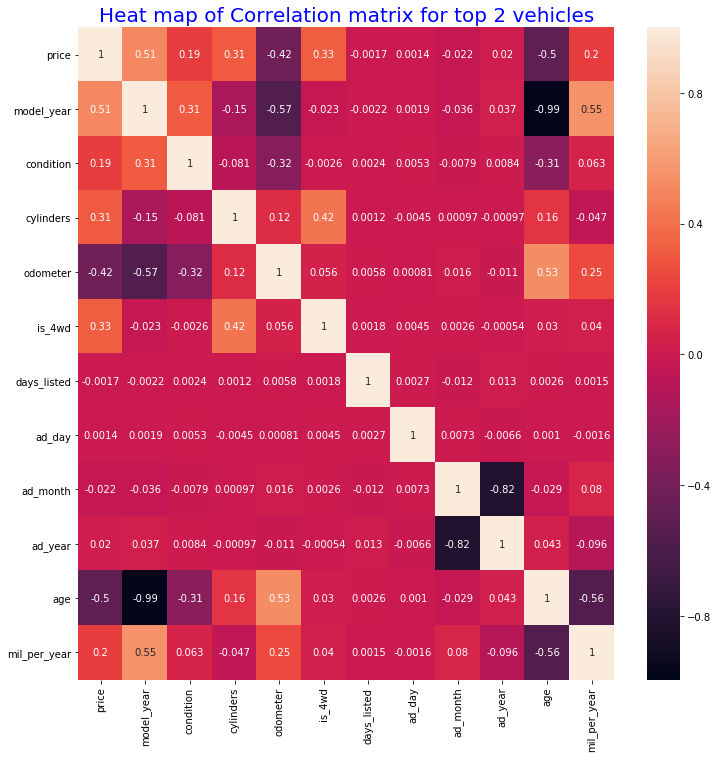

In [145]:
plt.figure(figsize=(12,12))
sns.heatmap(data_filter.corr(), annot=True)
plt.title("Heat map of Correlation matrix for top 2 vehicles", fontsize=20, color='blue')
plt.show()

**The only real observation is that [Age & odometer] are the values influencing price the most, & 3rd place and not conclusive is [condition].**

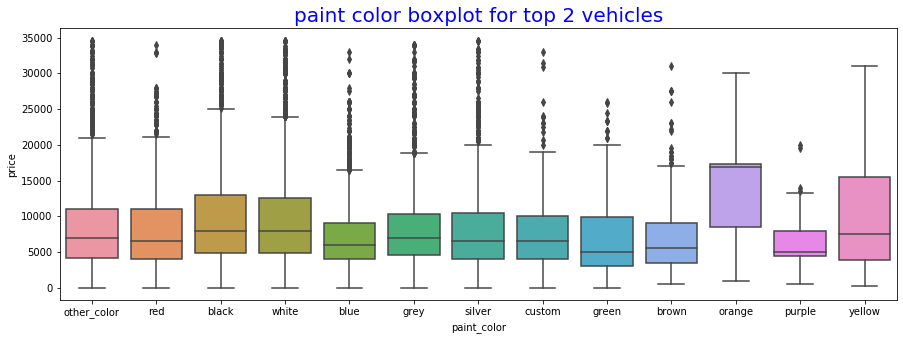

In [146]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "paint_color", y = "price", data = top_type)
plt.title("paint color boxplot for top 2 vehicles", fontsize=20, color='blue')
plt.show()

**[orange & yellow] are the values influencing price the most, however from the value count we learn that there is really low value of cars in this colors, which mean that this is not a real factor, and the actually result is that [white,black] are the most expensive cars.**

**my conclusion is that color dont effect the price.**

In [147]:
top_type.paint_color.value_counts()

other_color    4059
black          3588
silver         3384
white          3157
grey           2581
blue           2137
red            1733
green           600
brown           596
custom          564
orange           83
yellow           65
purple           64
Name: paint_color, dtype: int64

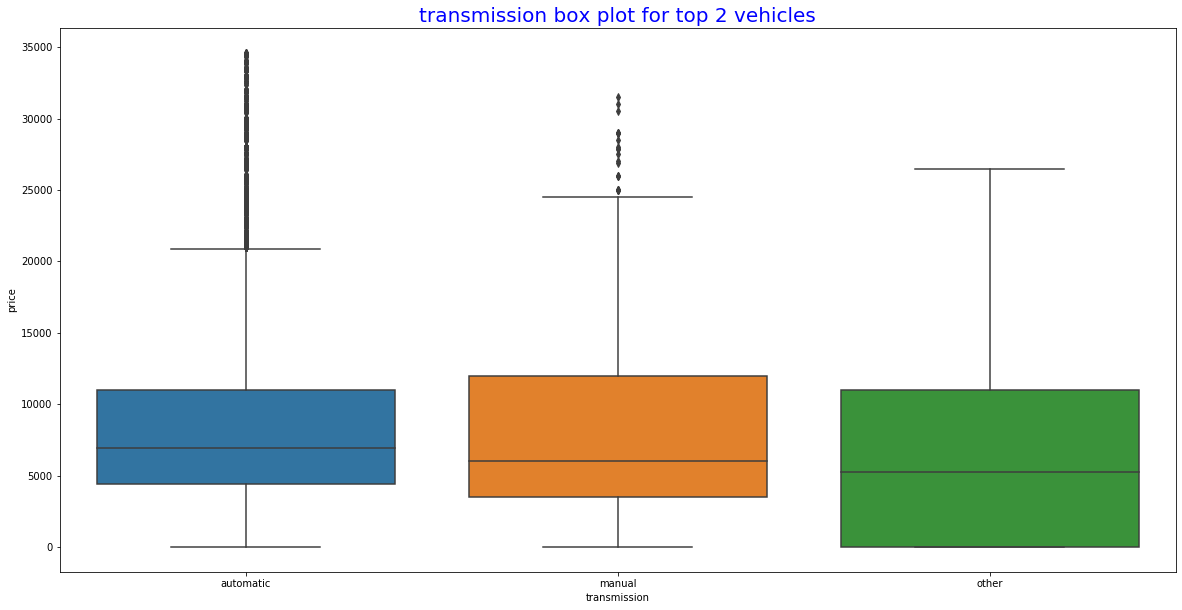

In [148]:
plt.figure(figsize = (20,10))
sns.boxplot(x = "transmission", y = "price", data = top_type)
plt.title("transmission box plot for top 2 vehicles", fontsize=20, color='blue')
plt.show()

[manual] transmission increase the value alittle, how ever there is only 1% of the datd in the value of[manual], and the diffrent from automatic is only by approx 2%. **my conclusion is that Transmission dont effect the price.**

In [149]:
top_type.transmission.value_counts()

automatic    21347
manual        1013
other          251
Name: transmission, dtype: int64

**Investegate each of the top 2 individually, with the top 3 values effecting the price[age, odomoter,condition] == SUV**

In [150]:
type_sedan = data_filter.query('type == "SUV"')
('Sedan\n')
(type_sedan.corr()['price'])

price           1.000000
model_year      0.578595
condition       0.269077
cylinders       0.003647
odometer       -0.491254
is_4wd          0.117939
days_listed    -0.022484
ad_day          0.011399
ad_month       -0.019136
ad_year         0.014940
age            -0.599368
mil_per_year    0.258719
Name: price, dtype: float64

In [151]:
top_type_suv = data_filter.query('type in ["SUV"]')

**[SUV age & price]**

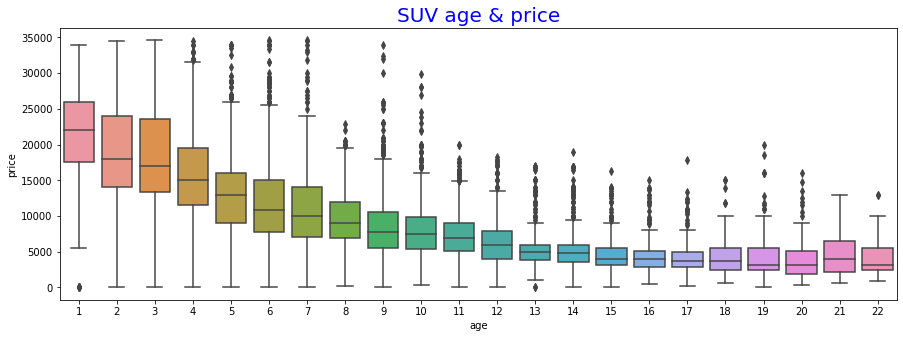

In [152]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "age", y = "price", data = top_type_suv)
plt.title("SUV age & price", fontsize=20, color='blue')
plt.show()

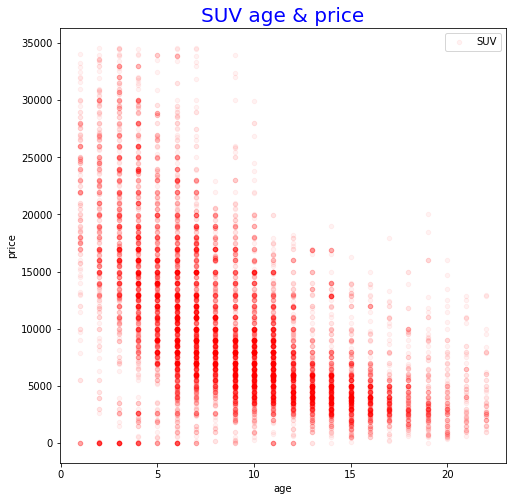

In [153]:
top_type_suv.plot(x = 'age', y = 'price', kind='scatter',figsize=(8, 8),color='red', label='SUV', alpha = 0.05)
plt.title("SUV age & price", fontsize=20, color='blue')
plt.show()

**There is a perfect correlation between the [age of a vehicle] & the [price] is being sold**

**[SUV condition & price]**

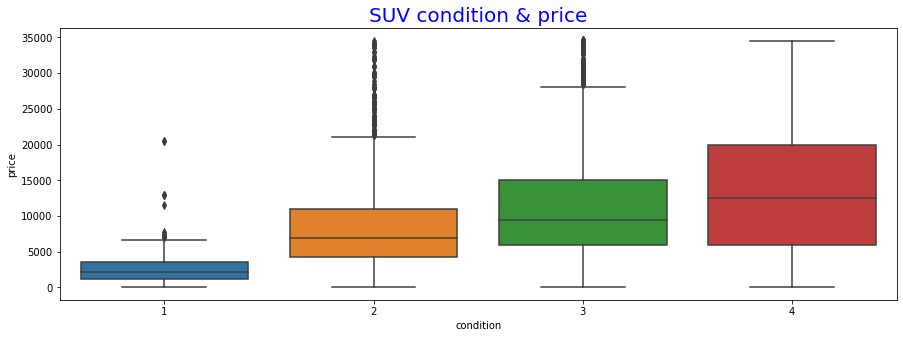

In [154]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "condition", y = "price", data = top_type_suv)
plt.title("SUV condition & price", fontsize=20, color='blue')
plt.show()

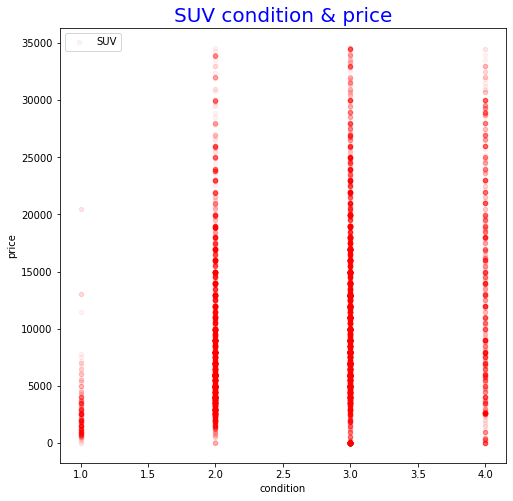

In [155]:
top_type_suv.plot(x = 'condition', y = 'price', kind='scatter',figsize=(8, 8),color='red', label='SUV', alpha = 0.05)
plt.title("SUV condition & price", fontsize=20, color='blue')
plt.show()

**There is a correlation between the [condition of a vehicle] & the [price] is being sold**

**[SUV odometer & price]**

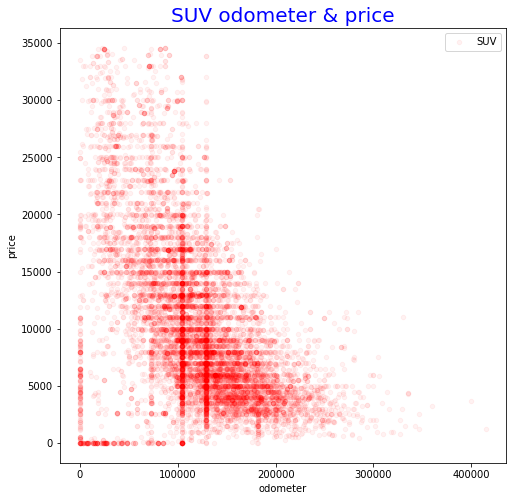

In [156]:
top_type_suv.plot(x = 'odometer', y = 'price', kind='scatter',figsize=(8, 8),color='red', label='SUV', alpha = 0.05)
plt.title("SUV odometer & price", fontsize=20, color='blue')
plt.show()

**There is a perfect correlation between the [odometer of a vehicle] & the [price] is being sold**

**Investegate each of the top 2 individually, with the top 3 values effecting the price[age, odomoter,condition] == sedan**

In [157]:
type_sedan = data_filter.query('type == "sedan"')
('Sedan\n')
(type_sedan.corr()['price'])

price           1.000000
model_year      0.621074
condition       0.300711
cylinders      -0.033286
odometer       -0.533994
is_4wd          0.049012
days_listed     0.004524
ad_day         -0.005090
ad_month       -0.035904
ad_year         0.030797
age            -0.626408
mil_per_year    0.217460
Name: price, dtype: float64

In [158]:
top_type_sedan = data_filter.query('type in ["sedan"]')

**[sedan age & price]**

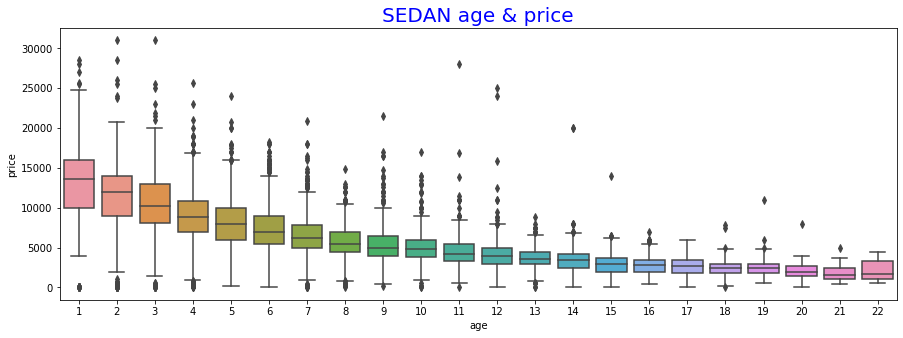

In [159]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "age", y = "price", data = top_type_sedan)
plt.title("SEDAN age & price", fontsize=20, color='blue')
plt.show()

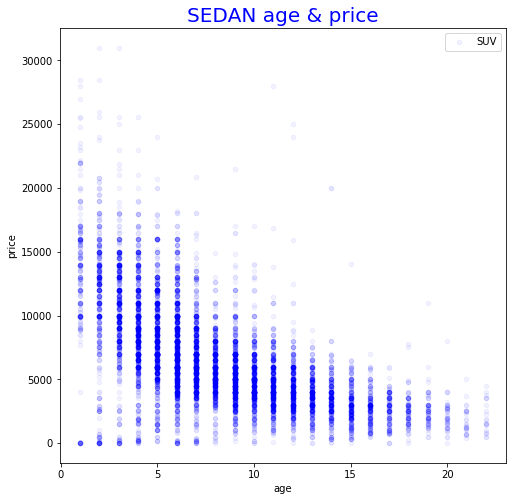

In [160]:
top_type_sedan.plot(x = 'age', y = 'price', kind='scatter',figsize=(8, 8),color='blue', label='SUV', alpha = 0.05)
plt.title("SEDAN age & price", fontsize=20, color='blue')
plt.show()

**[sedan condition & price]**

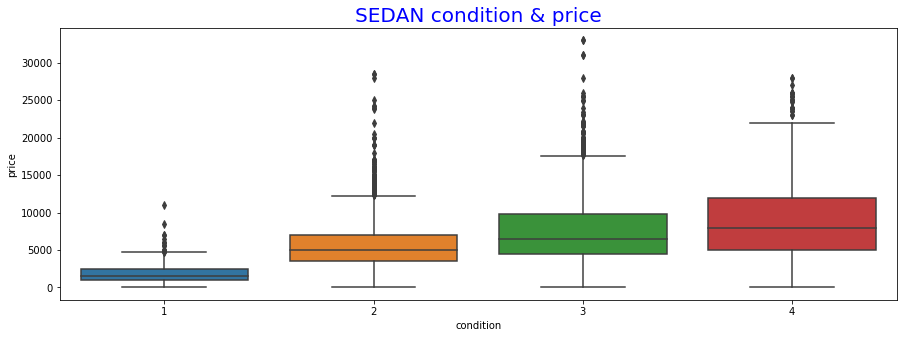

In [161]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "condition", y = "price", data = top_type_sedan)
plt.title("SEDAN condition & price", fontsize=20, color='blue')
plt.show()

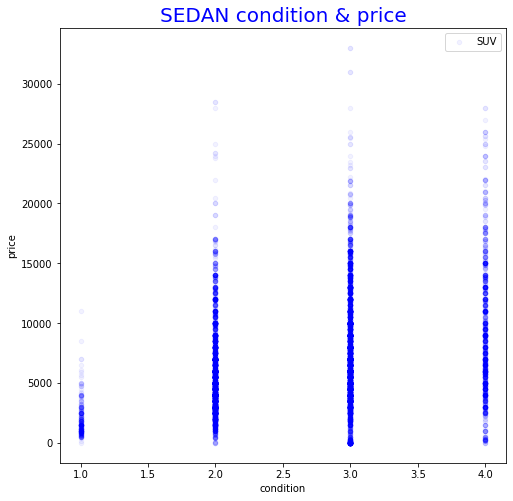

In [162]:
top_type_sedan.plot(x = 'condition', y = 'price', kind='scatter',figsize=(8, 8),color='blue', label='SUV', alpha = 0.05)
plt.title("SEDAN condition & price", fontsize=20, color='blue')
plt.show()

**[sedan odometer & price]**

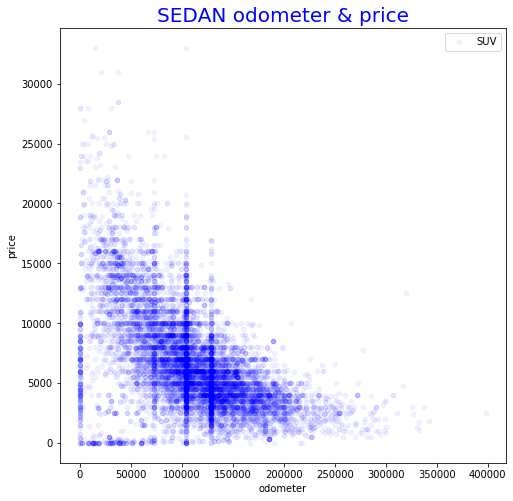

In [163]:
top_type_sedan.plot(x = 'odometer', y = 'price', kind='scatter',figsize=(8, 8),color='blue', label='SUV', alpha = 0.05)
plt.title("SEDAN odometer & price", fontsize=20, color='blue')
plt.show()

**After more investegation by splitting our data to the 2 chossen top selling vehicles we can see that the most effect on the price of a vehicle sold are [age of a vehicle] &  [condition], follow by [odometer count]. the rest of the values provided to me dont have noteble pattern that effect the price**

## General conclusion

1. **My project description was** I'm an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on my site every day. I need to study data collected over the last few years and determine which factors influence the price of a vehicle.

2. After reading my project descreption and Before proceeding to the task, I created a **work plan, and i tryed to follow my plan step by step**, there was some factors a long the way that forced my to move away from the orignal work plan becuse of data facts need to be investegate, but I always come back and continue follow the plan.

3. **work that I did:**
    1. loading the libreries for the project(some added witj the progress of the work).
    2. loading the data & investegate general information (The data has 51525 rows in 13 diffrent columns, with some missing data).
    3. **Preprocess the data:**
        1. Fill misiing values using servel method(fillna, pivot table),( the most importent value filled was is_4wd [50% of the data]).
        2. Check for duplicates-there wasnt any duplicates.
        3. Change data types, so it will be easy to work on the data & visually more effective.
        4. Enrich the data using new columns and pivot tablr and grouping.
        5. Start doing EAD on my clean and ready to work data.
        6. Find outliers and remove/fillter extreme data using servel methods(IQR, CORR).
        7. Save the new data to diffrent data set.
        8. work on the new data to answer the question I been ask using EAD methood include:
            1. corr.
            2. boxplot(from servel types, dippend on the question and the data).
            3. scatter box and etc.
            4. write sub conclutions with each step that I did.
    4. Answer the project question & write a finall conclusion.
4. **My conclusions are:**
    1. This data was created in automated way(internet form) becuse there was no problems in the word values like case sensative & etc.
    2. The data was in good condition to work on from the biggining.
    3. The missing values in five columns where filled and I didnt drop any segnificat values that effect my final conclutions:
        1.	Column model_year has **7.02%** of missing values.
        2.	Column odometer has **15.32%** of missing values.
        3.	Column cylinders has **10.20%** of missing values.
        4.	Column paint_color has **17.98%** of missing values.
        5.	Column is_4wd has **50.36%** of missing values.
    4. After the drop of outliers I had still 88% of my original data which is a very good data to work on. alto there was ways to make the project shorter and working only on 40% of the original data which in this specific case was still o.k for the some resultes. but in general I choose to work on as much data as I can for more conclusive results.
    5. **I found out that the most corealtion between the value of a car being sold to its type is between SUV & SEDAN. those 2 TYPE of vehicle sold in the highest price and volumes.**
    6. **I also found out that in this 2 types of vehicle the most corealtion to the price the vehicle been sold is between the [age, condition & odometer of the vehicle].**
        1. **The higher the car age is, the lower the price.**
        2. **The lower the condition is, the lower the price.**
        3. **The higher the odometer is, the lower the price.**
    7. **I also found out, that there is connection betwwen color & price and between transmission & price, but becuse the statistic is low, and for example there is not a lot vehicles in orange color, this facts cant be used as a general conclusion.**
    8. **Final conclusion == If a vehicle is SUV or SEDAN and is white or black, lower value of age and odometer, and higher value of condition, it will be sold in the highest price value and in the shorter time.**
        
        


 